# Shape.AI Internship Final Project

## Author : Helana Kuriakose 

## Problem Statement

  Big Mart is a grocery company or big super-market company that has several outlets around the world.Also it is a fastest growing chain of grocery market in India. As a Data Scientist, we need to predict the sales which they can expect ?
            
  If we can predict the sales, then we can say to that company that what are the challenges they may face and what are the brands or products they can sell more etc.. This helps the sales team to promote which type of items and they can also make several marketing plans.

## Work Flow

##### 1)	Data collection 

##### 2)	Data  Analysis

##### 3)    Data Pre-processing

##### 4)    Data Preperation

##### 5)	Train – Test data

##### 6)	Model Training

##### 7)	Model Evaluation

##### 8)	Making Prediction

## Importing Libraries

In [1]:
# importing libraries required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Data collection and Analysis

In [2]:
# loading the dataset into pandas dataframe

train_df = pd.read_csv('F:\python\Big mart data\Train.csv')

print("Dataset Collected Successfully")

Dataset Collected Successfully


In [3]:
# check te first 10 rows of the dataset to get an over-view of the dataset

train_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
# checking the feature values

train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Dataset Description

•	Item_Identifier - Unique product ID. In this FD stands for some food materials that can eat, DR stands for drinks, NC      stands for Non-Commutable products.

•	Item_Weight – Weight of product

•	Item_Fat_Content – Whether the product is low fat or not

•	Item_Visibility – The % of total display area of all products in a store allocated to the particular product

•	Item_Type – The category to which the product belongs

•	Item_MRP – Maximum Retail Price (list price) of the product

•	Outlet_Identifier – Unique store ID

•	Outlet_Establishment_Year –The year in which store was established

•	Outlet_Size – The size of the store in terms of ground area covered

•	Outlet_Location_Type –The type of city in which the store is located

•	Outlet_Type – Whether the outlet is just a grocery store or some sort of supermarket

•	Item_Outlet_Sales – Sales of the product in the particular store. This is the outcome variable to be predicted.


In [5]:
# check the number of data points and number of features

train_df.shape

(8523, 12)

In [6]:
# getting the information about the dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Out of 12 features, 7 of them are categorical features and 5 of them are numerica features.

Categorical features :-

•	Item_Identifier

•	Item_Fat_Content

•	Item_Type

•	Outlet_Identifier

•	Outlet_Size

•	Outlet_Location_Type

•	Outlet_Type

Numerical Features :-

•	Item_Weight

•	Item_Visibility

•	Item_MRP

•	Outlet_Establishment_Year

•	Item_Outlet_Sales


In [7]:
# checking the missing values

train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

   There are 1463 missing values in Item_Weight and 2410 missing values in Outlet_Size.

## Handling Missing Values

   Item_Weight is a Numerical Feature.So the missing values in the Item_Weight can handle using the Mean value. Mean value is the Average of all the values present in the Item_Weight column.
   
   Outlet_Size is a Categorical Feature.So the missing values in the Outlet_size can handle using the Mode value. Mode value is the most repeated value in the Outlet_Size column.

### Imputation

In [8]:
# mean value of the Item_Weight column

train_df['Item_Weight'].mean()

12.857645184136183

In [9]:
# filling the missing values in the Item_Weight column using the Mean value

train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean(), inplace = True)

In [10]:
# checking the missing values

train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We know that, the Outlet_size and Outlet_Type are related to each other. So we are filling the missing values of the Outlet_Size by using the values in Outlet_Type.

In [11]:
# mode of the Outlet_size 


mode_of_outlet_size = train_df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()))

mode_of_outlet_size = pd.DataFrame(mode_of_outlet_size)

mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [12]:
# collecting the missing values in Outlet_Size 

missing_values = train_df['Outlet_Size'].isnull()

print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [13]:
# filling the missing values of Outlet_Size with the mode values

train_df.loc[missing_values, 'Outlet_Size'] = train_df.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [14]:
train_df['Outlet_Size'].head(10)

0    Medium
1    Medium
2    Medium
3     Small
4      High
5    Medium
6      High
7    Medium
8     Small
9     Small
Name: Outlet_Size, dtype: object

In [15]:
# checking the missing values

train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

We have cleared all the missing values.

In [16]:
# checking the total unique values in Item_Weight

len(train_df['Item_Weight'].unique())

416

In [17]:
# checking unique values in Item_Fat_Content

train_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
# checking the total unique values in Item_Visibility

len(train_df['Item_Visibility'].unique())

7880

In [19]:
# checking unique values in Item_Type 

train_df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [20]:
# checking the total unique values in Item_MRP

len(train_df['Item_MRP'].unique())

5938

In [21]:
# checking unique values in Outlet_Identifier

train_df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [22]:
# checking unique values in Outlet_Establishment_Year

train_df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [23]:
# checking unique values in Outlet_Size

train_df['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [24]:
# checking unique values in Outlet_Location_Type

train_df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [25]:
# checking unique values in Outlet_Type

train_df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [26]:
# getting the statistical values of Numerical Features

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


## Univariate Analysis

### 1) Numerical Features

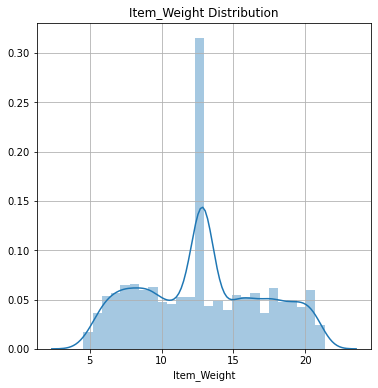

In [27]:
# Item_Weight Distribution

plt.figure(figsize = (6,6))
sb.distplot(train_df['Item_Weight'])
plt.title('Item_Weight Distribution')
plt.grid()
plt.show()

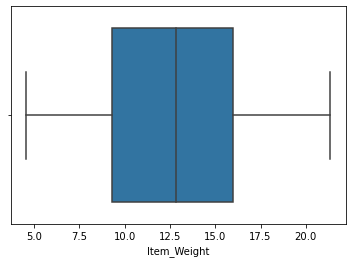

In [28]:
# boxplot of Item_Weight 

sb.boxplot(train_df['Item_Weight'])

This plot showing the distribution for Item_Weight and as we can see Item_Weight ranging 13 is having the highest disribution around 0.33

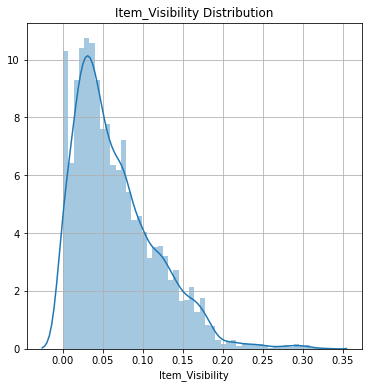

In [29]:
# Item_Visibility Distribution

plt.figure(figsize = (6,6))
sb.distplot(train_df['Item_Visibility'])
plt.title('Item_Visibility Distribution')
plt.grid()
plt.show()

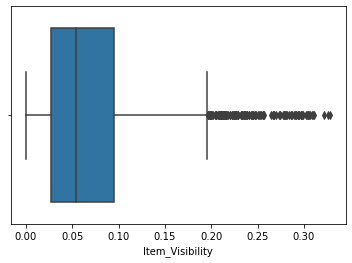

In [30]:
# boxplot of Item_Visibility

sb.boxplot(train_df['Item_Visibility'])

These plots shows the ditribution of Item_Visibility and we can see that the distribution is not a normal distribution. There is a skewness( right skewness) in the distribution of Item_Visibility. From the plot it is clear that the Item_Visibility ranging 0.03 having the highest ditribution around 10.

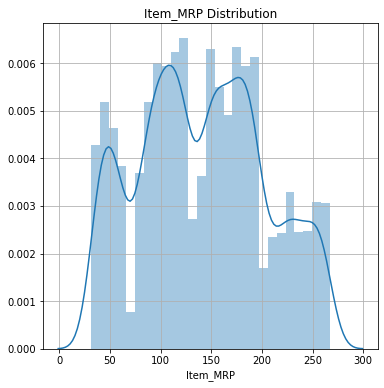

In [31]:
# Item_MRP Distribution

plt.figure(figsize = (6,6))
sb.distplot(train_df['Item_MRP'])
plt.title('Item_MRP Distribution')
plt.grid()
plt.show()

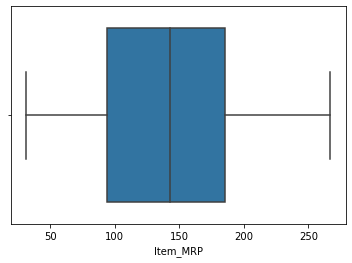

In [32]:
# boxplot of Item_MRP

sb.boxplot(train_df['Item_MRP'])

Item_MRP distribution is also not a normal distribution. There are some peaks for some kind of products. It shows there are more number of products in the price range of 100 and 170.

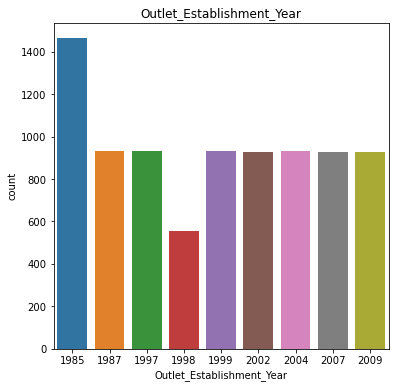

In [33]:
# Outlet_Establishment_Year 

plt.figure(figsize = (6,6))
sb.countplot(train_df['Outlet_Establishment_Year'])
plt.title('Outlet_Establishment_Year')
plt.show()

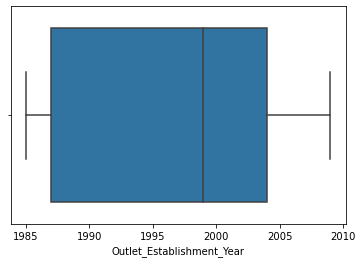

In [34]:
# boxplot of Outlet_Establishment_Year

sb.boxplot(train_df['Outlet_Establishment_Year'])

From the above count plot we can see that most of the outlets are established in the year of 1985 and less number of outlets are established in the year of 1998. 

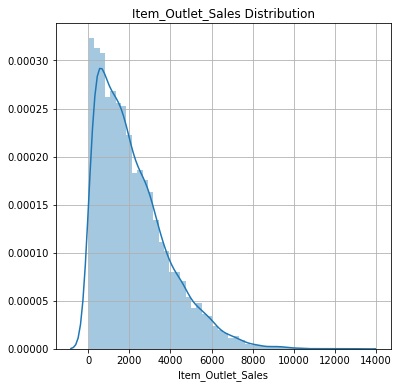

In [35]:
# Item_Outlet_Sales distribution

plt.figure(figsize = (6,6))
sb.distplot(train_df['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales Distribution')
plt.grid()
plt.show()

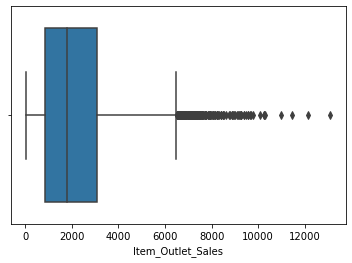

In [36]:
# boxplot of Item_Outlet_Sales

sb.boxplot(train_df['Item_Outlet_Sales'])

The above ditribution plot of Item Outlet Sales shows that this is also not a normal distribution. It is skewed(right skewed).This plot shows that the more item sales in outlets are in a range of 2000.

### 2) Categorical Features

Totally there are 7 Categorical values. We can drop the Item_Identifier and Outlet_Identifier, since they are just identification numbers.

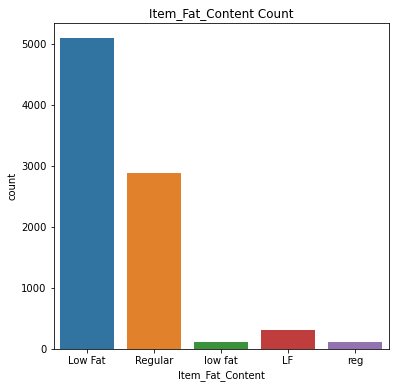

In [37]:
# Item_Fat_Content count

plt.figure(figsize = (6,6))
sb.countplot(train_df['Item_Fat_Content'])
plt.title('Item_Fat_Content Count')
plt.show()

In [38]:
# value counts

train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

The above count plot shows the distribution of Item_Fat_Content. Here we need to clean the data. From the plot, both the Low Fat, LF and low fat represents the same thing and both the Regular and reg represents the same thing. We will do it in Data Preprocessing.

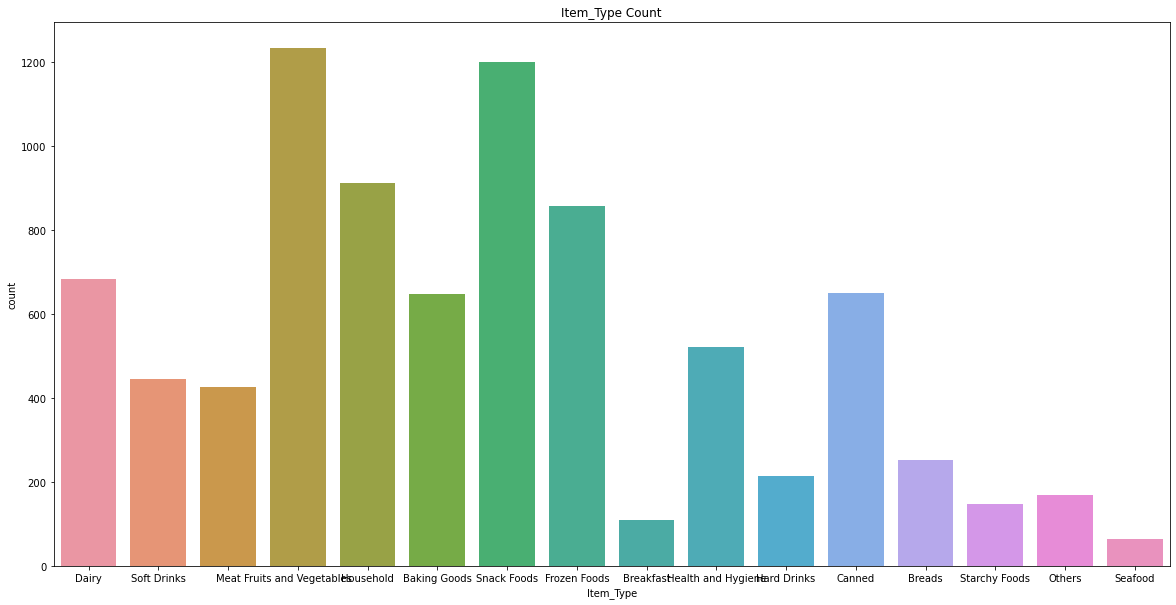

In [39]:
# Item_Type Count

plt.figure(figsize = (20,10))
sb.countplot(train_df['Item_Type'])
plt.title('Item_Type Count')
plt.show()

In [40]:
# value counts

train_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

From the above plot of Item_Type count, we can see that most of the items belongs to Fruits and vegitables and less number of items belongs to Seafoods.

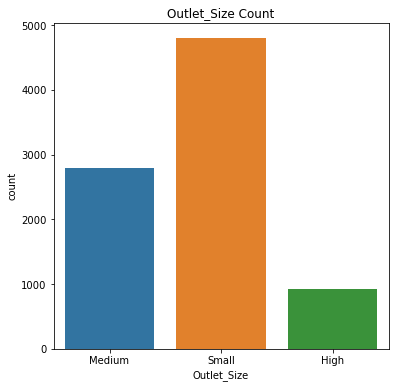

In [41]:
# Outlet_Size Count

plt.figure(figsize = (6,6))
sb.countplot(train_df['Outlet_Size'])
plt.title('Outlet_Size Count')
plt.show()

In [42]:
# value counts

train_df['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

From the above count plot of Outlet_Size, we can see that most of the Outlets are in Small size znd it's count is nearly 5000 and least outlets are in the high size and it's count is around 1000.

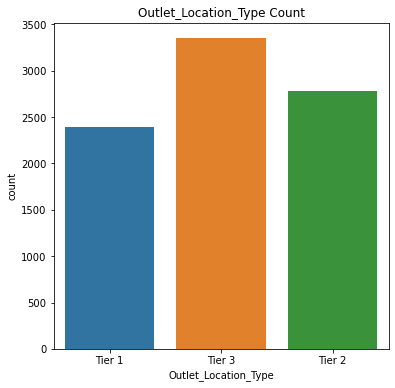

In [43]:
# Outlet_Location_Type Count

plt.figure(figsize = (6,6))
sb.countplot(train_df['Outlet_Location_Type'])
plt.title('Outlet_Location_Type Count')
plt.show()

In [44]:
# value counts

train_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

From the count plot of  Outlet_Location_Type, we can see that most of the outlets belongs to Tier 1 location.

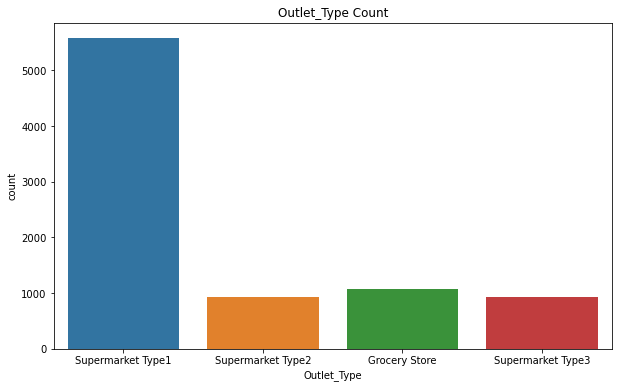

In [45]:
# Outlet_Type Count

plt.figure(figsize = (10,6))
sb.countplot(train_df['Outlet_Type'])
plt.title('Outlet_Type Count')
plt.show()

In [46]:
# value counts

train_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

From the plot, we can see that most of the Outlets belongs to Supermarket Type 1.

## Bivariate Analysis

Bivariate Analysis is to see the relationship between the target variable and feature variables.

### 1) Numerical Features

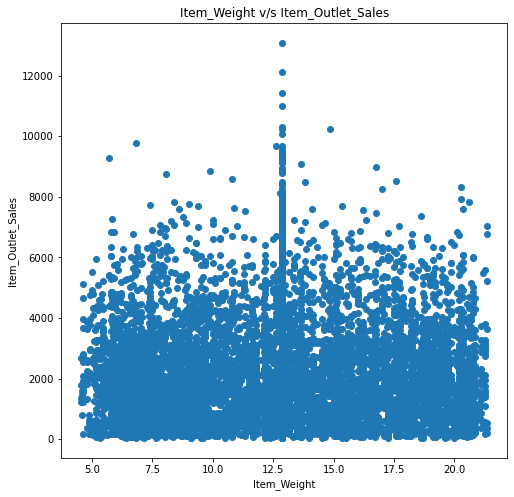

In [47]:
# Item_Weight v/s Item_Outlet_Sales

plt.figure(figsize = (8,8))
plt.scatter(x = train_df['Item_Weight'], y = train_df['Item_Outlet_Sales'])
plt.title('Item_Weight v/s Item_Outlet_Sales')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

The Scatter Plot between Item_Weight and Item_Outlet_Sales shows, Item_Weight had low correlation with the Outlet_Sales.

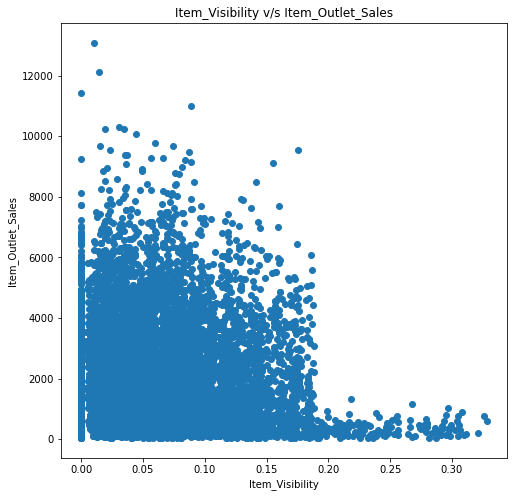

In [48]:
# Item_Visibility v/s Item_Outlet_Sales

plt.figure(figsize = (8,8))
plt.scatter(x = train_df['Item_Visibility'], y = train_df['Item_Outlet_Sales'])
plt.title('Item_Visibility v/s Item_Outlet_Sales')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

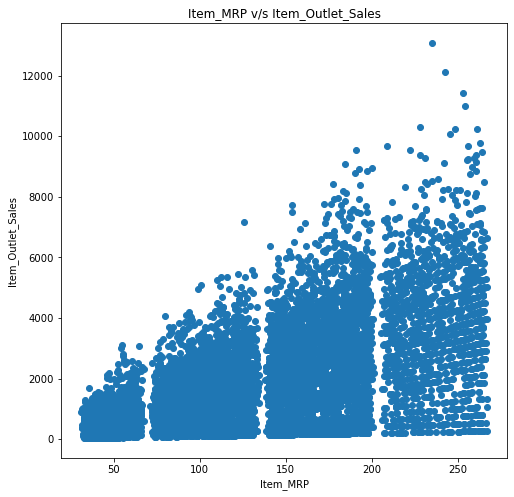

In [49]:
# Item_MRP v/s Item_Outlet_Sales

plt.figure(figsize = (8,8))
plt.scatter(x = train_df['Item_MRP'], y = train_df['Item_Outlet_Sales'])
plt.title('Item_MRP v/s Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

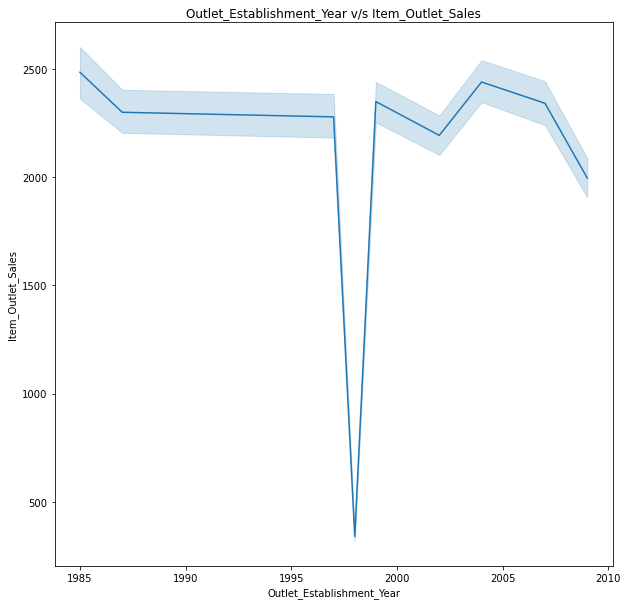

In [50]:
# Outlet_Establishment_Year v/s Item_Outlet_Sales


plt.figure(figsize = (10,10))
sb.lineplot(x = train_df['Outlet_Establishment_Year'], y = train_df['Item_Outlet_Sales'])
plt.title('Outlet_Establishment_Year v/s Item_Outlet_Sales')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.show()

From the above line plot, we can see that there is a steap decrease in the Outlet Sales in between the years 1995 and 2000, Since the Outlets established during the these years are very low and it affects the Outlet Sales.

### 2) Categorical Features

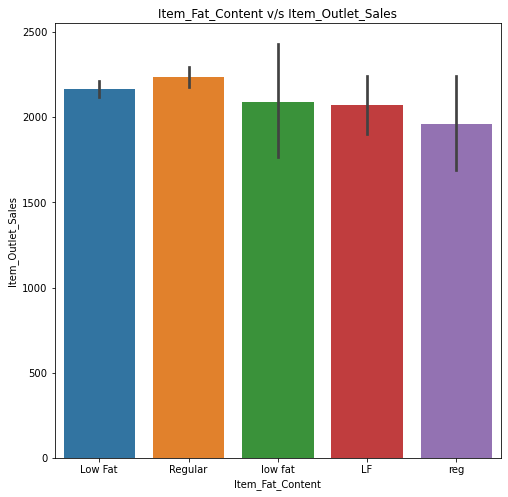

In [51]:
# Item_Fat_Content v/s Item_Outlet_Sales

plt.figure(figsize = (8,8))
sb.barplot(x = train_df['Item_Fat_Content'], y = train_df['Item_Outlet_Sales'])
plt.title('Item_Fat_Content v/s Item_Outlet_Sales')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.show()

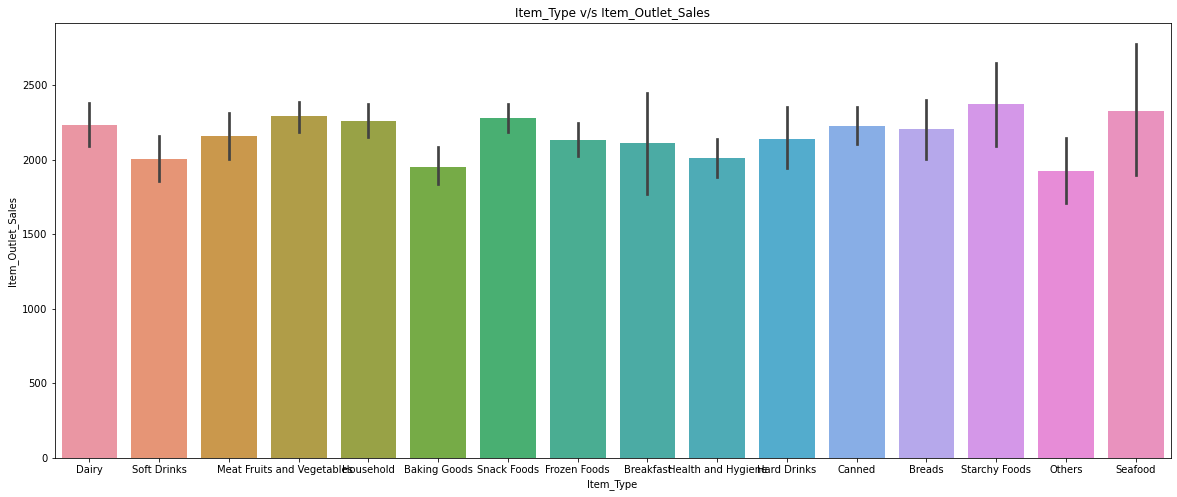

In [52]:
# Item_Type v/s Item_Outlet_Sales

plt.figure(figsize = (20,8))
sb.barplot(x = train_df['Item_Type'], y = train_df['Item_Outlet_Sales'])
plt.title('Item_Type v/s Item_Outlet_Sales')
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

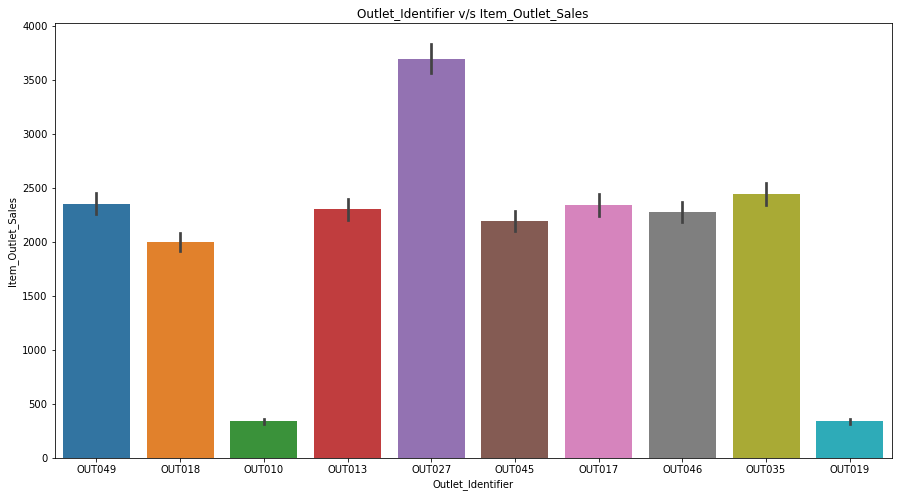

In [53]:
# Outlet_Identifier v/s Item_Outlet_Sales

plt.figure(figsize = (15,8))
sb.barplot(x = train_df['Outlet_Identifier'], y = train_df['Item_Outlet_Sales'])
plt.title('Outlet_Identifier v/s Item_Outlet_Sales')
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.show()

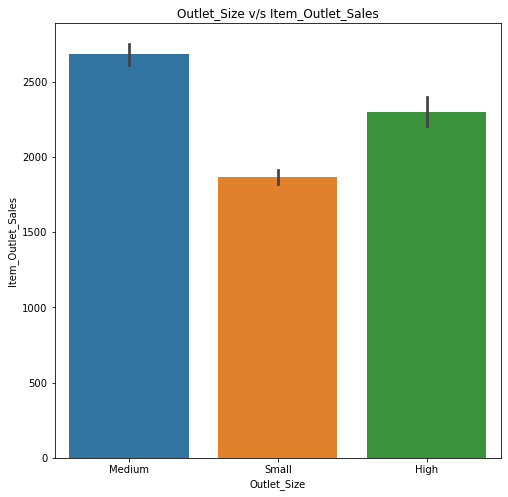

In [54]:
# Outlet_Size v/s Item_Outlet_Sales


plt.figure(figsize = (8,8))
sb.barplot(x = train_df['Outlet_Size'], y = train_df['Item_Outlet_Sales'])
plt.title('Outlet_Size v/s Item_Outlet_Sales')
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.show()

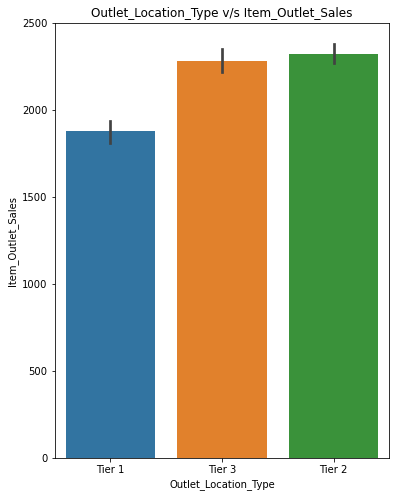

In [55]:
# Outlet_Location_Type v/s Item_Outlet_Sales

plt.figure(figsize = (6,8))
sb.barplot(x = train_df['Outlet_Location_Type'], y = train_df['Item_Outlet_Sales'])
plt.title('Outlet_Location_Type v/s Item_Outlet_Sales')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

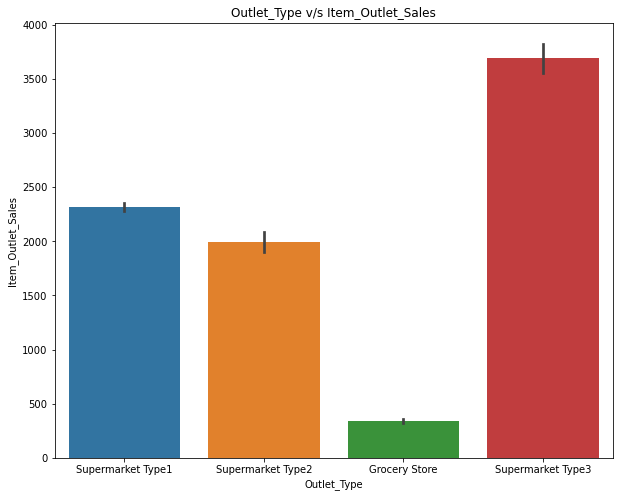

In [56]:
# Outlet_Type v/s Item_Outlet_Sales

plt.figure(figsize = (10,8))
sb.barplot(x = train_df['Outlet_Type'], y = train_df['Item_Outlet_Sales'])
plt.title('Outlet_Type v/s Item_Outlet_Sales')
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

## Multivariate Analysis

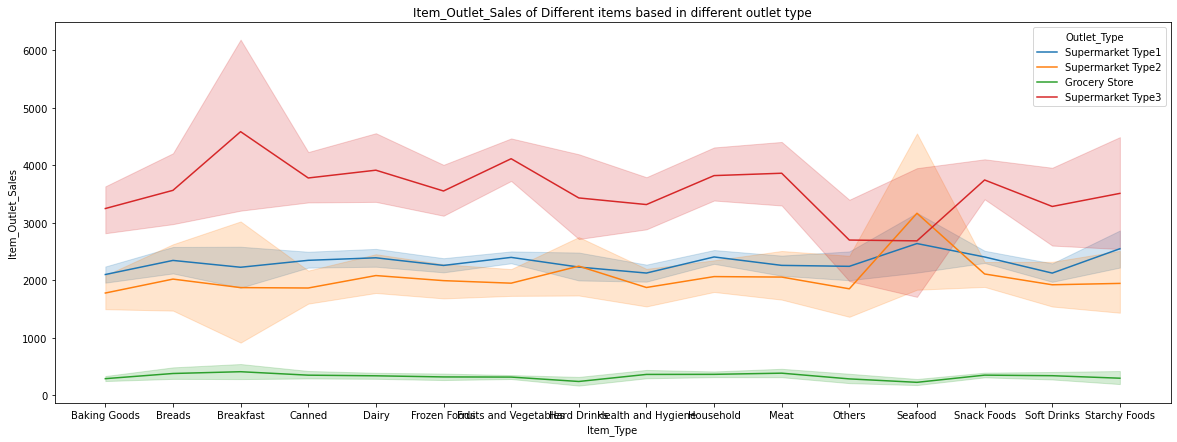

In [57]:
# Item_Outlet_Sales of Different items based in different outlet type

plt.figure(figsize = (20,7))
sb.lineplot(x = train_df['Item_Type'], y = train_df['Item_Outlet_Sales'], hue = train_df['Outlet_Type'])
plt.title('Item_Outlet_Sales of Different items based in different outlet type')
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

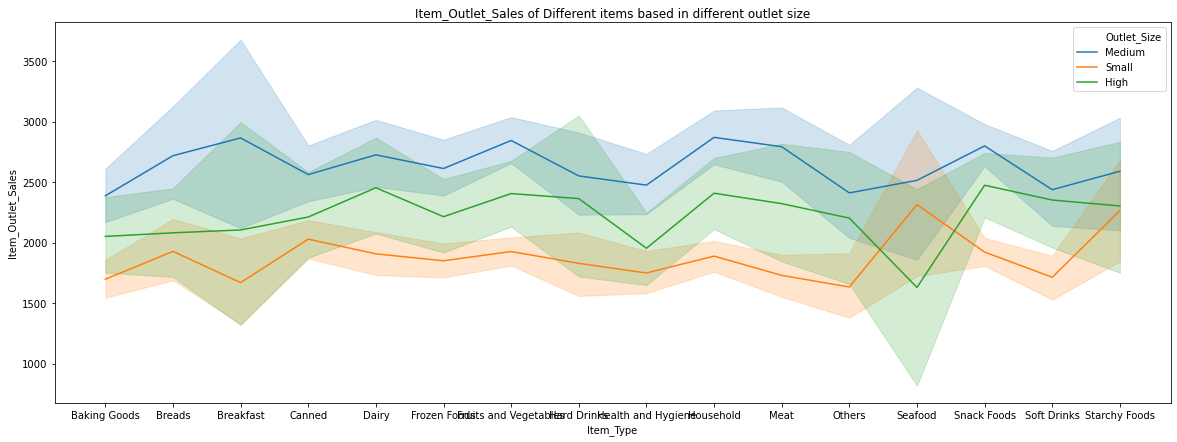

In [58]:
# Item_Outlet_Sales of Different items based in different outlet size

plt.figure(figsize = (20,7))
sb.lineplot(x = train_df['Item_Type'], y = train_df['Item_Outlet_Sales'], hue = train_df['Outlet_Size'])
plt.title('Item_Outlet_Sales of Different items based in different outlet size')
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

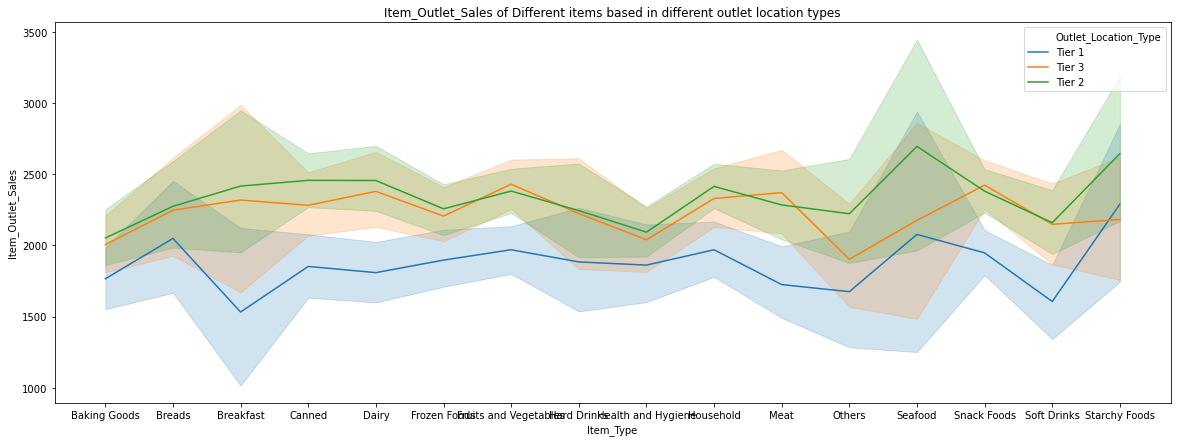

In [59]:
#Item_Outlet_Sales of Different items based in different outlet location types

plt.figure(figsize = (20,7))
sb.lineplot(x = train_df['Item_Type'], y = train_df['Item_Outlet_Sales'], hue = train_df['Outlet_Location_Type'])
plt.title('Item_Outlet_Sales of Different items based in different outlet location types')
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

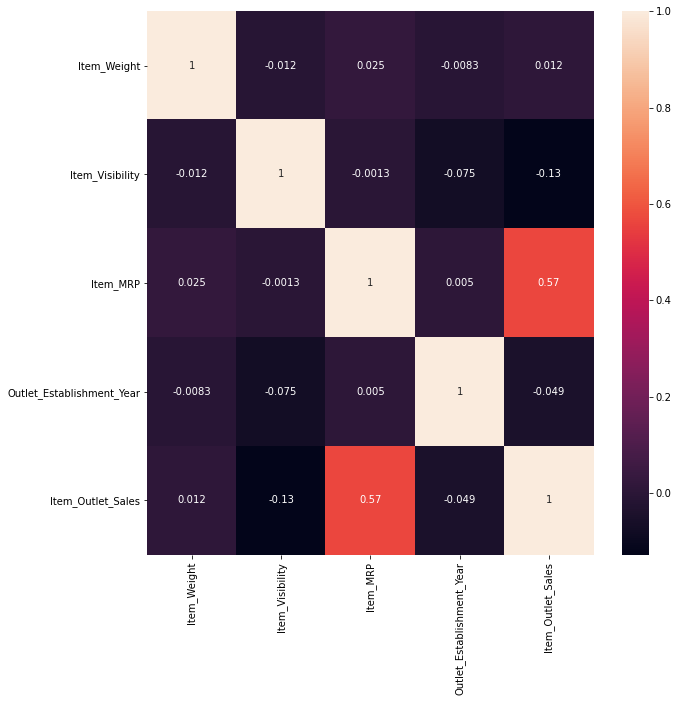

In [60]:
plt.figure(figsize=(10,10))
sb.heatmap(train_df.corr(),annot=True)

## Data Pre-Processing

### Clean the Item_Fat_Content Column

In [61]:
# getting the counts of Item_Fat_Content which belongs to different categories

train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [62]:
# replacing the values

train_df.replace({'Item_Fat_Content' : {'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace = True)

In [63]:
# getting the value counts 

train_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

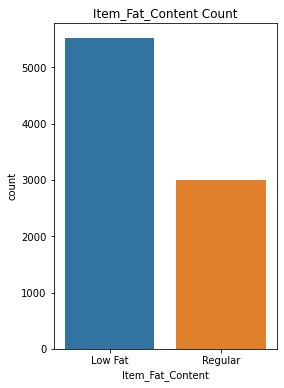

In [64]:
# Item_Fat_Content Count

plt.figure(figsize = (4,6))
sb.countplot(train_df['Item_Fat_Content'])
plt.title('Item_Fat_Content Count')
plt.show()

From the above count plot, we can see that most of the items contains Low fat.

Cleaned the Item_Fat_Content Column Successfully.

#### Convert all the categorical variables into Numerical variables

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [66]:
# coverting categorical values

train_df['Item_Fat_Content'] = encoder.fit_transform(train_df['Item_Fat_Content'])

train_df['Item_Type'] = encoder.fit_transform(train_df['Item_Type'])

train_df['Outlet_Identifier'] = encoder.fit_transform(train_df['Outlet_Identifier'])

train_df['Outlet_Size'] = encoder.fit_transform(train_df['Outlet_Size'])

train_df['Outlet_Location_Type'] = encoder.fit_transform(train_df['Outlet_Location_Type'])

train_df['Outlet_Type'] = encoder.fit_transform(train_df['Outlet_Type'])

In [67]:
# getting the dataset information

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 599.4+ KB


In [68]:
# checking the first 5 records

train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


We have successfully converted the Categorical Features into Numerical Features.

## Splitting the Dataframe into Features and Target Variable

In [69]:
x = train_df.drop(['Item_Outlet_Sales','Item_Identifier'], axis = 1)

y = train_df['Item_Outlet_Sales']

In [70]:
# check the first 5 records to getting an over-view of feature variables

x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,19.20,1,0.000000,6,182.0950,0,1998,2,2,0
4,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [71]:
# checking the shape of feature variables

x.shape

(8523, 10)

In [72]:
# check the first 5 records to getting an over-view of target variable

y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [73]:
# checking the shape of target variable

y.shape

(8523,)

## Train - Test Split

In [74]:
# splitting the dataset into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [75]:
# checking the size of train and test set

print("x size :",x.shape)
print("x-train size :",x_train.shape)
print("x_test size :",x_test.shape)
print("y size :",y.shape)
print("y-train size :",y_train.shape)
print("y_test size :",y_test.shape)

x size : (8523, 10)
x-train size : (6818, 10)
x_test size : (1705, 10)
y size : (8523,)
y-train size : (6818,)
y_test size : (1705,)


## Model Training

### 1) Multiple Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
LI_regression = LinearRegression(normalize = True)
LI_regression.fit(x_train, y_train)

LinearRegression(normalize=True)

### 2) Decision Tree Regressor

In [77]:
from sklearn.tree import DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 100)
DT_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

### 3) Random Forest Regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor(max_depth = 6, n_estimators = 10)
RF_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10)

## Model Evaluation

### 1) Multiple Linear Regression

In [79]:
# prediction 

LI_y_pred = LI_regression.predict(x_test)

In [80]:
# r2 score

from sklearn.metrics import r2_score
r2_test_LI = r2_score(y_test, LI_y_pred)
print("The r2 Score is ",r2_test_LI)

The r2 Score is  0.4926186887048555


In [81]:
# checking the training score

LI_training_score = round(LI_regression.score(x_train,y_train)*100,3)
print("The training score is",LI_training_score)

The training score is 50.589


In [82]:
# MSE and RMSE

from sklearn import metrics

print("Mean Squared Error of Test data of Linear regression is",metrics.mean_squared_error(y_test, LI_y_pred))
print("Root Mean Squared Error of Test data of Linear regression is",np.sqrt(metrics.mean_squared_error(y_test, LI_y_pred)))

Mean Squared Error of Test data of Linear regression is 1387222.0626135175
Root Mean Squared Error of Test data of Linear regression is 1177.8039151800767


### 2) Decision Tree Regressor

In [83]:
# prediction

DT_y_pred = DT_regressor.predict(x_test)

In [84]:
# r2 score

r2_test_DT = r2_score(y_test, DT_y_pred)
print("The r2 Score is ",r2_test_DT)

The r2 Score is  0.5714828432159418


In [85]:
# checking the training score

DT_training_score = round(DT_regressor.score(x_train,y_train)*100,3)
print("The training score is",DT_training_score)

The training score is 61.788


In [86]:
# MSE and RMSE

print("Mean Squared Error of Test data of Decision Tree regressor is",metrics.mean_squared_error(y_test, DT_y_pred))
print("Root Mean Squared Error of Test data of Decision Tree regressor is",np.sqrt(metrics.mean_squared_error(y_test, DT_y_pred)))

Mean Squared Error of Test data of Decision Tree regressor is 1171601.0047391548
Root Mean Squared Error of Test data of Decision Tree regressor is 1082.4051943422828


### 3) Random Forest Regressor

In [87]:
# prediction

RF_y_pred = RF_regressor.predict(x_test)

In [88]:
# r2 score

r2_test_RF = r2_score(y_test, RF_y_pred)
print("The r2 Score is ",r2_test_RF)

The r2 Score is  0.5868256423355138


In [89]:
# checking the training score

RF_training_score = round(RF_regressor.score(x_train,y_train)*100,3)
print("The training score is",RF_training_score)

The training score is 62.492


In [90]:
# MSE and RMSE

print("Mean Squared Error of Test data of Random Forest regressor is",metrics.mean_squared_error(y_test, RF_y_pred))
print("Root Mean Squared Error of Test data of Random Forest regressor is",np.sqrt(metrics.mean_squared_error(y_test, RF_y_pred)))

Mean Squared Error of Test data of Random Forest regressor is 1129652.535280183
Root Mean Squared Error of Test data of Random Forest regressor is 1062.851135051463


Here the best model to predict the Item_Outlet_Sales is Random Forest Regressor with a training accuracy of 62.419

## Predicting the Data

In [91]:
# importing testing data into pandas dataframe

test_df = pd.read_csv('F:\python\Big mart data\Test.csv')
print('Test data imported successfully')

Test data imported successfully


In [92]:
# check te first 10 rows of the dataset to get an over-view of the dataset

test_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [93]:
# checking the feature values

test_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [94]:
# check the number of data points and number of features

test_df.shape

(5681, 11)

In [95]:
# getting the information about the dataset

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [96]:
# checking the missing values

test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

There are 976 missing values in Item_Weight column and 1606 missing values in Outlet_Size column.

So we are going to fill the Item_Weight by Mean value, since it is a numberical feature and filling the Outlet_Size column with the median value, since it is a categorical value.

In [97]:
# mean value of the Item_Weight column

test_df['Item_Weight'].mean()

12.695633368756374

In [98]:
# filling the missing values in the Item_Weight column using the Mean value

test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(), inplace = True)

In [99]:
# mode of the Outlet_size 

mode_of_outlet_size = test_df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()))

mode_of_outlet_size = pd.DataFrame(mode_of_outlet_size)

mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [100]:
# collecting the missing values in Outlet_Size 

missing_values = test_df['Outlet_Size'].isnull()

print(missing_values)

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool


In [101]:
# filling the missing values of Outlet_Size with the mode values

test_df.loc[missing_values, 'Outlet_Size'] = test_df.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [102]:
test_df['Outlet_Size'].head(10)

0    Medium
1     Small
2     Small
3     Small
4    Medium
5     Small
6    Medium
7    Medium
8     Small
9     Small
Name: Outlet_Size, dtype: object

In [103]:
# checking the missing values

test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

We have cleared all the missing values.

In [104]:
# getting the statistical values of Numerical Features

test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,5681.0,12.695633,4.245189,4.555,9.195000,12.695633,15.850000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


## Test Data Pre-processing

### Clean the Item_Fat_Content Column

In [105]:
# check the Item_Fat_Content value counts

test_df['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [106]:
# clean the Item_Fat_Content

test_df.replace({'Item_Fat_Content' : {'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace = True)

In [107]:
# check the Item_Fat_Content value counts

test_df['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

### Convert all the categorical variables into Numerical variables

In [108]:
encoder_test = LabelEncoder()

In [109]:
# coverting categorical values

test_df['Item_Fat_Content'] = encoder_test.fit_transform(test_df['Item_Fat_Content'])

test_df['Item_Type'] = encoder_test.fit_transform(test_df['Item_Type'])

test_df['Outlet_Identifier'] = encoder_test.fit_transform(test_df['Outlet_Identifier'])

test_df['Outlet_Size'] = encoder_test.fit_transform(test_df['Outlet_Size'])

test_df['Outlet_Location_Type'] = encoder_test.fit_transform(test_df['Outlet_Location_Type'])

test_df['Outlet_Type'] = encoder_test.fit_transform(test_df['Outlet_Type'])

In [110]:
# getting the dataset information

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int32  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int32  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int32  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int32  
 9   Outlet_Location_Type       5681 non-null   int32  
 10  Outlet_Type                5681 non-null   int32  
dtypes: float64(3), int32(6), int64(1), object(1)
memory usage: 355.2+ KB


Now we are storing the independent variables into one variable.

In [111]:
test = test_df.drop(['Item_Identifier'], axis = 1)

In [112]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [113]:
# check the number of data points and number of features

test.shape

(5681, 10)

In [114]:
# predict the target variable

predict = RF_regressor.predict(test)

In [115]:
predict

array([1639.7429039 , 1372.43219703,  558.03768443, ..., 1990.69139674,
       3648.78586824, 1305.56860781])

In [116]:
# store the target variable into a newly created column in test dataframe

test_df['Item_Outlet_Sales'] = predict

In [117]:
# print the dataset with predicted values

test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1,1639.742904
1,FDW14,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1,1372.432197
2,NCN55,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0,558.037684
3,FDQ58,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1,2443.520021
4,FDY38,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3,5841.655098
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1,2124.521161
5677,FDD47,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2,2743.762495
5678,NCO17,10.000000,0,0.073529,8,118.7440,7,2002,2,1,1,1990.691397
5679,FDJ26,15.300000,1,0.000000,3,214.6218,2,2007,2,1,1,3648.785868


## Conclusions

#### 1)	The establishments of outlets in each year affects the overall item sales.Because the year 1998, where less number of outlets established was the year where less item sales happened.

#### 2)	Seafood is very less among the items,  but it is one of the major item that have high sales.

#### 3)	Outlet number OUT027 is the outlet that has high item sales, whereas outlet number OUT010 and OUT019 are the outlets that has low item sales.

#### 4)	Most of the outlets belongs to ‘Small’ outlet size, but high item sales is happening in the ‘Medium’ size outlets and low item sales happening in the ‘Small’ size outlets.

#### 5)	Most of the outlets located in the ‘Tier 3’ location, but high item sales happening in the ‘Tier 2’ location. ‘Tier 3’ is just below to the ‘Tier 2’ for item sales.

#### 6)	High item sales is in the ‘Supermarket Type 3’, whereas most of the outlets are belongs to ‘Supermarket Type 1’ and low item sales is happening in the ‘Grocery Store’.

#### 7)	In the ‘Supermarket Type 3’, the Breakfast Food sales is high as compared to other food items and also as compared to other outlet types.

#### 8)	The sales of ‘Seafood’ is high in ‘Supermarket Type 2’ as compared to other outlet types.

#### 9)	‘Seafood’ sales and ‘Others’ sales is low in ‘Supermarket Type 3’ as compared to rest items.

#### 10)	In ‘Supermarket Type 1’ and in ‘Grocery Store’, almost all the items are sold equally.

#### 11)	The ‘Seafood’ sales is very low in ‘High’ size of outlets.

#### 12)	People who purchase from ‘Small’ outlets likes to buy more ‘Seafood’ and ‘Starchy food’ as compared to  other items.

#### 13)	The sales of ‘Breakfast’ and ‘Soft Drinks’ is low in the malls which is located in ‘Tier 1’.

#### 14)	People who purchase from ‘Tier 2’ likes to buy more ‘Seafood’ and ‘Starchy Food’.

#### 15)    Item_visibility is having nearly zero correlation with our dependent variable item_outlet_sales and grocery store outlet_type. This means that the sales are not affected by visibility of item which is a contradiction to the general assumption of “more visibility thus, more sales”.

#### 16)    Item_MRP (maximum retail price) is positively correlated with sales at an outlet, which indicates that the price quoted by an outlet plays an important factor in sales
